In [1]:
import seaborn as sns
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

import sys
!conda install --yes --prefix {sys.prefix} nltk
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))
%matplotlib inline


Solving environment: ...working... done

# All requested packages already installed.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
reviews = pd.read_csv("C:/Users/david/Mineria Datos/Documentos/winemag-data_first150k.csv", index_col=0)
Data=pd.DataFrame(reviews)

Data.to_csv('winemag2.csv', columns = ['country', 'description', 'variety'])
Data2 = pd.read_csv('winemag2.csv')
Data2.head(4)
#Data2=Data.rename(columns = {'description':'Descripcion','country':'Pais','points':'Puntaje','price':'Precio','province':'Ciudad','variety':'Tipo_Vino'})
#Data3=Data3.drop(['designation','region_1', 'region_2', 'winery'],axis=1)
#Data4 = Data3.dropna(axis=0) #Eliminamos los 5 filas que no contienen pais
#Data3.head(7)

,Unnamed: 0,country,description,variety
0,0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir


In [4]:
Data2.drop(Data2.columns[[0]], axis=1, inplace=True)
Data2.head(5)

,country,description,variety
0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,France,"This is the top wine from La Bégude, named aft...",Provence red blend


In [5]:
Data2['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [6]:
Data2.to_csv('winemag3.csv', index=False)
read = pd.read_csv('winemag3.csv')
read.head(2)

,country,description,variety
0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro


In [13]:
import ssl
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

Data3 = pd.read_csv('C:/Users/david/Mineria Datos/Documentos/solo-rev2.csv', header = None)
Data3.head(10)

,0,1,2
0,This tremendous 100% varietal wine hails from ...,US,Cabernet Sauvignon
1,"Ripe aromas of fig, blackberry and cassis are ...",Spain,Tinta de Toro
2,Mac Watson honors the memory of a wine once ma...,US,Sauvignon Blanc
3,"This spent 20 months in 30% new French oak, an...",US,Pinot Noir
4,"This is the top wine from La Bégude, named aft...",France,Provence red blend
5,"Deep, dense and pure from the opening bell, th...",Spain,Tinta de Toro
6,Slightly gritty black-fruit aromas include a s...,Spain,Tinta de Toro
7,Lush cedary black-fruit aromas are luxe and of...,Spain,Tinta de Toro
8,This re-named vineyard was formerly bottled as...,US,Pinot Noir
9,The producer sources from two blocks of the vi...,US,Pinot Noir


In [15]:
Data3.columns = ['description', 'country', 'variety']
Data3.head(10)


,description,country,variety
0,This tremendous 100% varietal wine hails from ...,US,Cabernet Sauvignon
1,"Ripe aromas of fig, blackberry and cassis are ...",Spain,Tinta de Toro
2,Mac Watson honors the memory of a wine once ma...,US,Sauvignon Blanc
3,"This spent 20 months in 30% new French oak, an...",US,Pinot Noir
4,"This is the top wine from La Bégude, named aft...",France,Provence red blend
5,"Deep, dense and pure from the opening bell, th...",Spain,Tinta de Toro
6,Slightly gritty black-fruit aromas include a s...,Spain,Tinta de Toro
7,Lush cedary black-fruit aromas are luxe and of...,Spain,Tinta de Toro
8,This re-named vineyard was formerly bottled as...,US,Pinot Noir
9,The producer sources from two blocks of the vi...,US,Pinot Noir


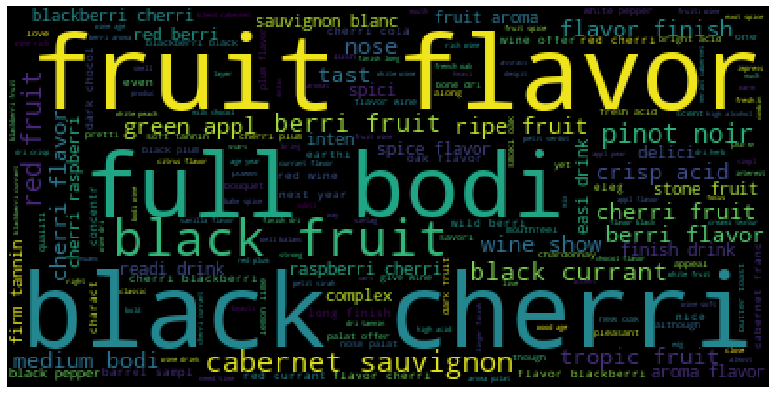

In [11]:
n = len(Data3)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = Data3.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
Data3['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

In [17]:
header = ['description','country',  'variety']
writer = Data3[Data3['country'] == 'US']
writer.to_csv('us-wine.csv', columns = header, index=False)

lol = pd.read_csv('us-wine.csv')
lol.head(4)

,description,country,variety
0,This tremendous 100% varietal wine hails from ...,US,Cabernet Sauvignon
1,Mac Watson honors the memory of a wine once ma...,US,Sauvignon Blanc
2,"This spent 20 months in 30% new French oak, an...",US,Pinot Noir
3,This re-named vineyard was formerly bottled as...,US,Pinot Noir


In [18]:
header = ['description','country',  'variety']
writer = Data3[Data3['country'] == 'Italy']
writer.to_csv('italy-wine.csv', columns = header, index=False)

lol = pd.read_csv('italy-wine.csv')
lol.head(4)

,description,country,variety
0,"Elegance, complexity and structure come togeth...",Italy,Friulano
1,"Underbrush, scorched earth, menthol and plum s...",Italy,Sangiovese
2,"Forest floor, tilled soil, mature berry and a ...",Italy,Sangiovese
3,"Aromas of forest floor, violet, red berry and ...",Italy,Sangiovese


In [19]:
header = ['description','country',  'variety']
writer = Data3[Data3['country'] == 'Portugal']
writer.to_csv('portugal-wine.csv', columns = header, index=False)

lol = pd.read_csv('portugal-wine.csv')
lol.head(4)

,description,country,variety
0,"This is a super-ripe, still very young wine. I...",Portugal,Portuguese Red
1,It is the ripe dark Alicante Bouschet that dom...,Portugal,Portuguese Red
2,"The local Baga grape, better known for produci...",Portugal,Baga
3,This family-owned estate has produced an immed...,Portugal,Portuguese Red


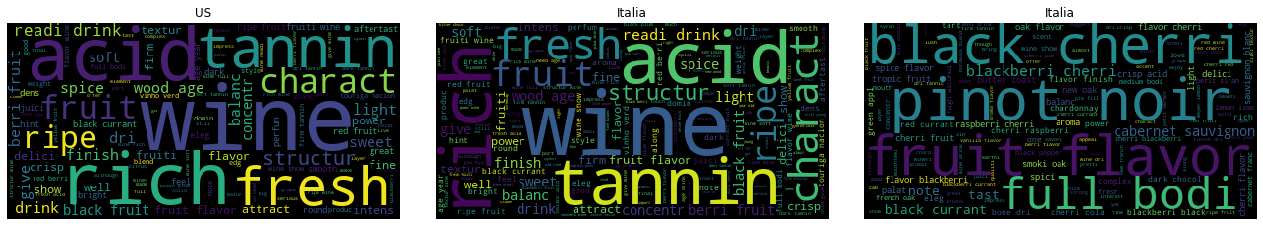

In [39]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
    
dini = pd.read_csv("portugal-wine.csv", header = None)
dmcu = pd.read_csv("us-wine.csv", header = None)
dord = pd.read_csv("italy-wine.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols

spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Portugal", "US", "Italia"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

In [45]:
import sys
!{sys.executable} -m pip install pyspellchecker

In [ ]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from spellchecker import SpellChecker
sc = SpellChecker()
adicionales = [ 'ready', 'texture']
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("portugal-wine.csv", header = None)
d.columns = ['description', 'country', 'variety']
spa = stopwords.words("english") 
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [12, 6]
texto = ''
for original in d.description:
    palabras = tokenizer.tokenize(original)
    revisadas = []
    for p in sc.known(palabras):
        revisadas += [p] * palabras.count(p) # para no alterar las frecuencias       
    for p in sc.unknown(palabras):
         revisadas += [sc.correction(p)] * palabras.count(p)
    inicial = [stemmer.stem(p) for p in revisadas if p.lower() not in spa]
    quedar = [p for p in inicial if p not in adicionales]
    texto += ' '.join(quedar) + ' '
plt.title('')
nube = WordCloud().generate(texto)
plt.imshow(nube)
plt.axis("off")
plt.show()